# Mehmet Egehan Pala 31089 CS 419 Assignment 1

In [1]:
# Download the sample images
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A -O reference_image_1.jpg

!wget --no-check-certificate \
    https://drive.google.com/uc?id=19WE6K3ljoJT8phAWk7wP09mYJ5bJ98gm -O test_image_1.jpg

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1UAGF1bFaBRdpwwCWNc373lJwVINff7MT -O reference_image_2.tif

!wget --no-check-certificate \
    https://drive.google.com/uc?id=1pVa-8Nwr0n4BMYMI6-XXemxjh5E0HHlG -O test_image_2.tif

--2024-10-12 20:45:52--  https://drive.google.com/uc?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A
Resolving drive.google.com (drive.google.com)... 74.125.132.100, 74.125.132.138, 74.125.132.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A [following]
--2024-10-12 20:45:52--  https://drive.usercontent.google.com/download?id=1gTsX8yMtbi4Dq8oHJpqg9VQ3hcB4di5A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623657 (2.5M) [image/jpeg]
Saving to: ‘reference_image_1.jpg’

reference_image_1.j 100%[===================>]   2.50M  --.-KB/s    in 0.06s   

2024-10-12 20:45:55 (41.3 MB/s) - ‘r

In [2]:
# importing necessary packages
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

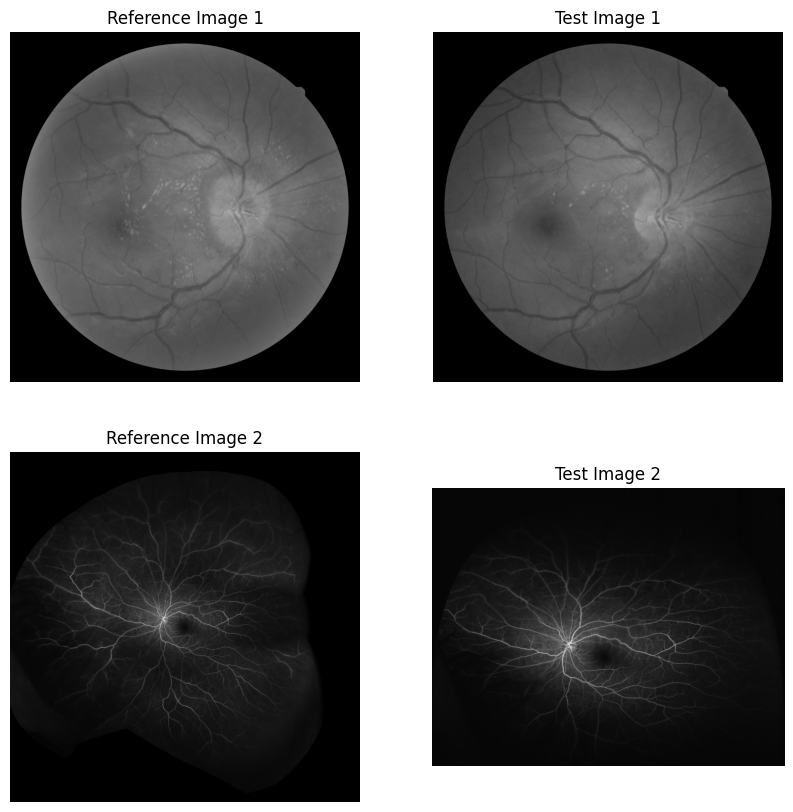

In [3]:
# load and display images
reference_image_1 = cv2.imread('reference_image_1.jpg', cv2.IMREAD_GRAYSCALE)
reference_image_2 = cv2.imread('reference_image_2.tif', cv2.IMREAD_GRAYSCALE)

test_image_1 = cv2.imread('test_image_1.jpg', cv2.IMREAD_GRAYSCALE)
test_image_2 = cv2.imread('test_image_2.tif', cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(reference_image_1, cmap='gray')
axs[0, 0].set_title("Reference Image 1")
axs[0, 1].imshow(test_image_1, cmap='gray')
axs[0, 1].set_title("Test Image 1")
axs[1, 0].imshow(reference_image_2, cmap='gray')
axs[1, 0].set_title("Reference Image 2")
axs[1, 1].imshow(test_image_2, cmap='gray')
axs[1, 1].set_title("Test Image 2")

for ax in axs.flat:
    ax.axis('off')

In [4]:
# reference_img_x, reference_img_y, test_img_x, test_img_y
CONTROL_POINTS_1 = [
  [332.000, 872.000, 388.000, 822.000],
  [370.000, 1897.000, 357.000, 1849.000],
  [1212.000, 2483.000, 1153.000, 2487.000],
  [1761.000, 348.000, 1843.000, 400.000],
  [2384.000, 1912.000, 2358.000, 2000.000],
  [2527.000, 1099.000, 2556.000, 1198.000],
  [1922.000, 1131.000, 1949.000, 1194.000],
  [642.000, 1222.000, 670.000, 1192.000],
  [1930.000, 1408.000, 1944.000, 1460.000],
  [1339.000, 1768.000, 1328.000, 1784.000]
]


CONTROL_POINTS_2 = [
  [1276.7,1697.5,793.81,1439.19],
  [1725.5,1314.3,1397.56,926.19],
  [1965.98,1195.38,1811.19,763.81],
  [2600.29,1390.69,2884.81,1087.44],
  [2447.66,1640.86,2624.19,1375.81],
  [1836.78,1760.34,1638.69,1492.81],
  [1464.01,1530.99,1022.56,1223.56],
  [1286.35,2101.64,827.19,1913.94],
  [1844.89,2130.84,1656.69,1999.81],
  [2344.07,1997.9,2468.56,1837.06],
  [2215.9,2228.81,2276.94,2155.06],
  [1840.87,2564.24,1625.94,2602.06],
  [2577.49,2438.16,2894.19,2383.06],
  [1414.47,1047.6,766.44,711.69]
]



## Task 1

In [6]:
def calculate_affine_transform(src_points, dst_points):
    # Convert the source and destination points to NumPy arrays of type float32
    src_points = np.array(src_points, dtype=np.float32)
    dst_points = np.array(dst_points, dtype=np.float32)

    arr1 =[]
    arr2 =[]
    for i in range(0,src_points.size//2):

      #using the linear algebra math in the 2-Point_processing slide (pages between 24-26)
      arr1.append([src_points[i][0], src_points[i][1], 1, 0, 0, 0])
      arr1.append([0, 0, 0, src_points[i][0], src_points[i][1], 1])
      arr2.append(dst_points[i][0])
      arr2.append(dst_points[i][1])


    # Convert the list of equations to a NumPy matrix
    mtrx = np.matrix(arr1)
    arr2 = np.array(arr2).reshape(-1, 1)

     # Solve the least squares problem to find the affine transformation parameters
    x, residuals, rank, s = np.linalg.lstsq(mtrx, arr2, rcond=None)


    array = np.array(x)
    # Reshape the array into a 2x3 matrix
    matrix_2x3 = array.reshape(2, 3)

    return matrix_2x3

# Calculate affine transform for the first pair of images
src_points_1 = np.array(CONTROL_POINTS_1)[:, 2:]  # Test image points
dst_points_1 = np.array(CONTROL_POINTS_1)[:, :2]  # Reference image points
matrix_1 = calculate_affine_transform(src_points_1, dst_points_1)

# Calculate affine transform for the second pair of images
src_points_2 = np.array(CONTROL_POINTS_2)[:, 2:]  # Test image points
dst_points_2 = np.array(CONTROL_POINTS_2)[:, :2]  # Reference image points
matrix_2 = calculate_affine_transform(src_points_2, dst_points_2)

print("Affine transform matrix for pair 1:")
print(matrix_1)
print("\nAffine transform matrix for pair 2:")
print(matrix_2)

Affine transform matrix for pair 1:
[[ 1.00058275e+00  6.75474685e-02 -1.10721458e+02]
 [-6.83793365e-02  9.99605425e-01  7.54322178e+01]]

Affine transform matrix for pair 2:
[[ 6.11271710e-01 -3.67788222e-02  8.96807017e+02]
 [-1.94209551e-03  7.82356334e-01  5.67471756e+02]]


## Task 2

In [7]:
def apply_affine_transform(image, matrix):

   # Use OpenCV's warpAffine function to apply the affine transformation
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))


In [8]:
def visualize_registration(reference, test, registered, title):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(reference, cmap='gray')
    axs[0].set_title("Reference Image")
    axs[1].imshow(test, cmap='gray')
    axs[1].set_title("Test Image")
    axs[2].imshow(registered, cmap='gray')
    axs[2].set_title("Registered Image")
    for ax in axs:
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

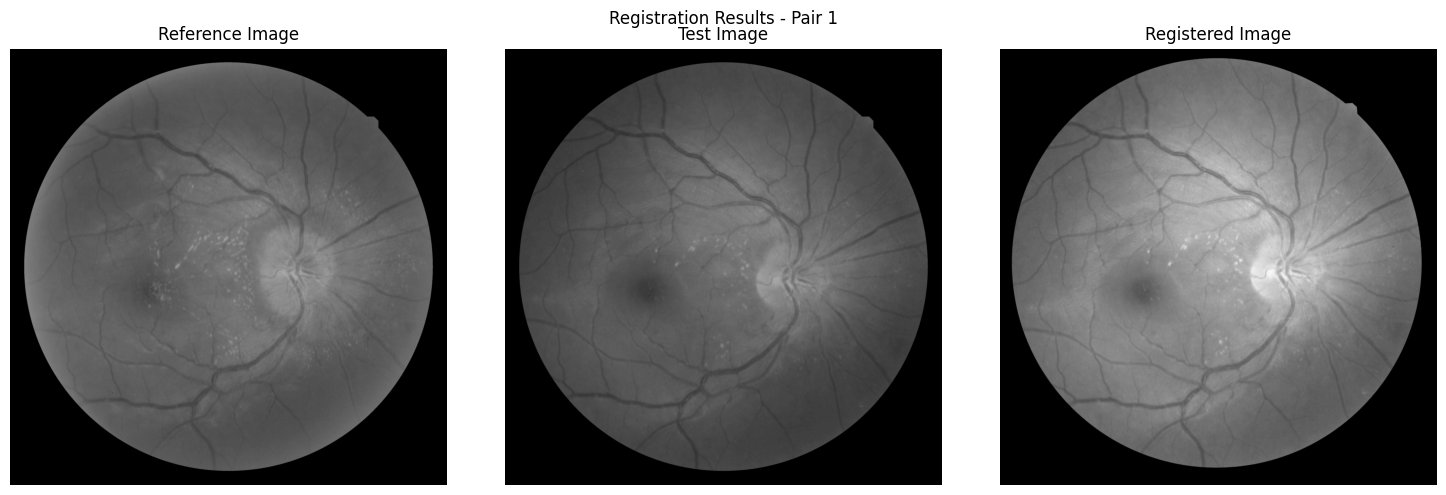

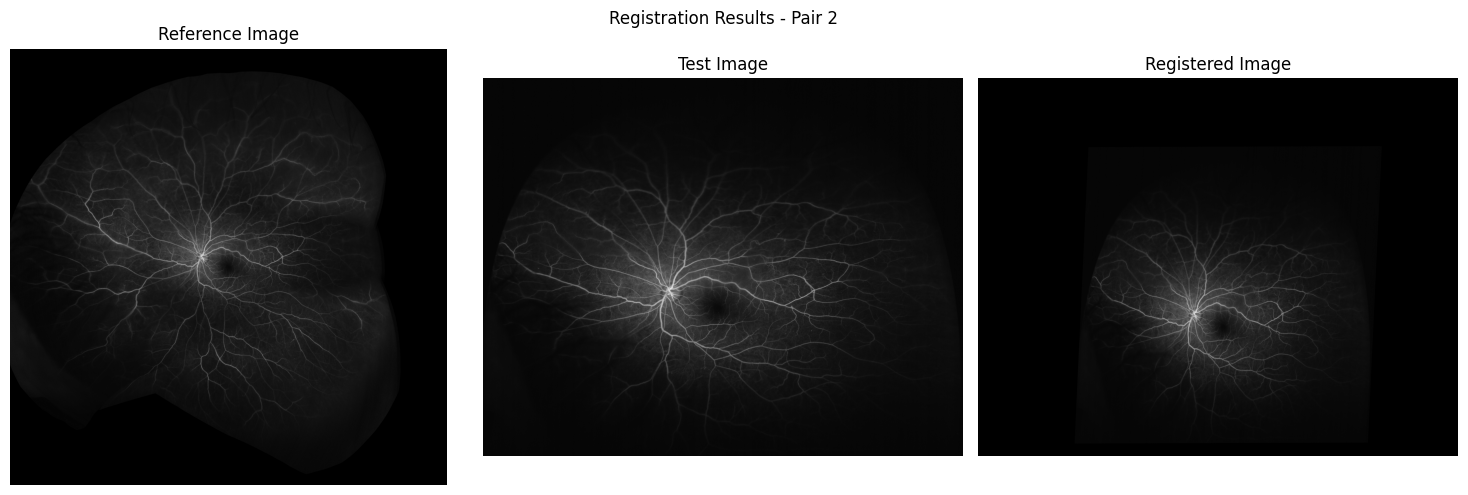

In [9]:
# Apply registration and visualize for the first pair
registered_image_1 = apply_affine_transform(test_image_1, matrix_1)
visualize_registration(reference_image_1, test_image_1, registered_image_1, "Registration Results - Pair 1")

# Apply registration and visualize for the second pair
registered_image_2 = apply_affine_transform(test_image_2, matrix_2)
visualize_registration(reference_image_2, test_image_2, registered_image_2, "Registration Results - Pair 2")

## Task 3

In [10]:
def calculate_mse(image1, image2):
    return np.mean((image1.astype(np.float32) - image2.astype(np.float32))**2)


In [11]:

def affine_backward(registered_image, matrix):
    # Apply forward transform

    # Calculate inverse transform
    new_row = np.array([0,0,1])

    # Add the row to the matrix using np.vstack()
    matrix_3x3 = np.vstack([matrix, new_row])
    inverse_matrix = np.linalg.inv(matrix_3x3)
    inverse_matrix = inverse_matrix[:2]

    # Apply inverse transform
    back_transformed = cv2.warpAffine(registered_image, inverse_matrix, (registered_image.shape[1], registered_image.shape[0]))

    return back_transformed



In [12]:
# Calculate MSE for both image pairs
back_transformed_1 = affine_backward(registered_image_1, matrix_1)
back_transformed_2 = affine_backward(registered_image_2, matrix_2)

mse_1 = calculate_mse(test_image_1, back_transformed_1)
mse_2 = calculate_mse(test_image_2, back_transformed_2)

print(f"Mean Squared Error for pair 1: {mse_1}")
print(f"Mean Squared Error for pair 2: {mse_2}")


Mean Squared Error for pair 1: 1.1740361452102661
Mean Squared Error for pair 2: 3.568664312362671


In [13]:
def visualize_backward(test, registered, title):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(test, cmap='hot')
    axs[0].set_title("Test Image")
    axs[1].imshow(registered, cmap='hot')
    axs[1].set_title("Registered Image")
    for ax in axs:
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

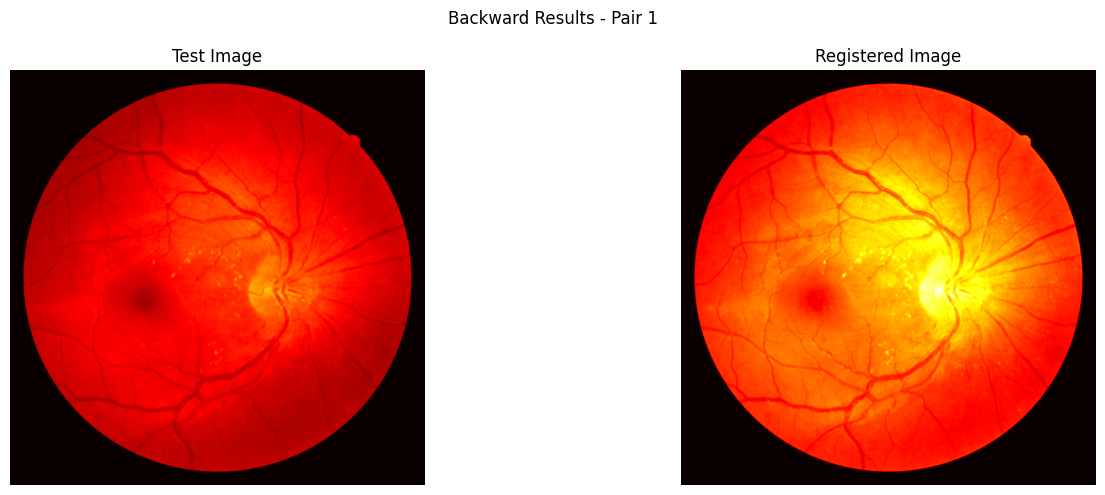

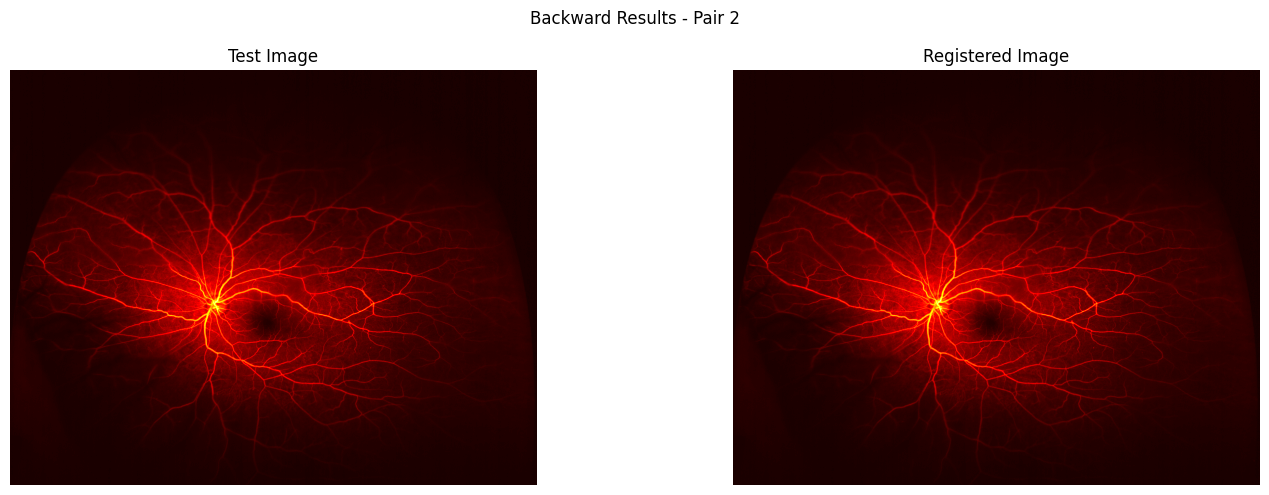

In [14]:
visualize_backward(test_image_1, back_transformed_1, "Backward Results - Pair 1")
visualize_backward(test_image_2, back_transformed_2, "Backward Results - Pair 2")

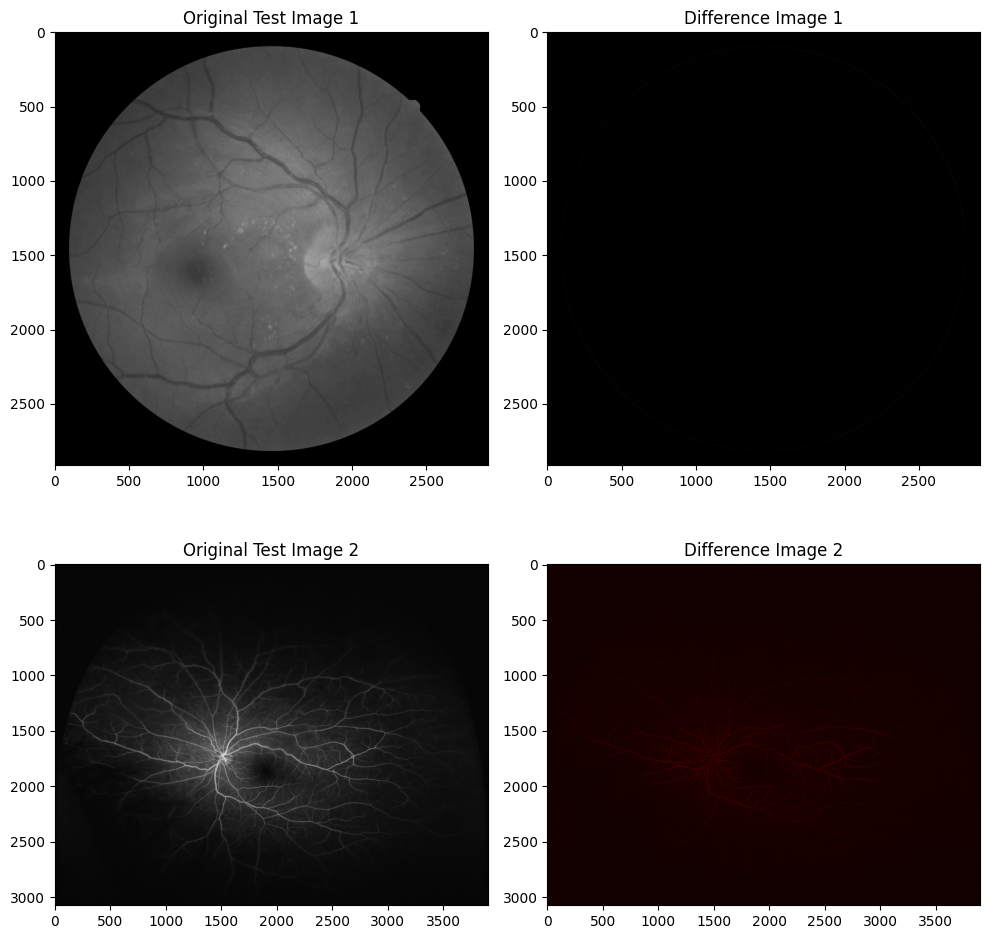

In [15]:
subtractedImage_1 = cv2.subtract(test_image_1, back_transformed_1)
subtractedImage_2 = cv2.subtract(test_image_2, back_transformed_2)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(test_image_1, cmap='gray')
axs[0, 0].set_title('Original Test Image 1')
axs[0, 1].imshow(subtractedImage_1, cmap='gray')
axs[0, 1].set_title('Difference Image 1')

axs[1, 0].imshow(test_image_2, cmap='gray')
axs[1, 0].set_title('Original Test Image 2')
axs[1, 1].imshow(subtractedImage_2, cmap='hot')
axs[1, 1].set_title('Difference Image 2')

plt.tight_layout()
plt.show()



